In [147]:
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.io.renderers.default = 'colab'
import folium
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data

In [148]:
confirmed_global_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_global_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'
recovered_global_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv '


In [149]:
def read_data(url):
   data = pd.read_csv(url, encoding='utf-8')
   return data.groupby('Country/Region').sum()

confirmed_global = read_data(confirmed_global_url)
deaths_global = read_data(deaths_global_url)
recovered_global = read_data(recovered_global_url)
confirmed_global.head(2)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,875

In [150]:
confirmed = confirmed_global.drop(columns=['Lat', 'Long']).T
deaths = deaths_global.drop(columns=['Lat', 'Long']).T
recovered = recovered_global.drop(columns=['Lat', 'Long']).T
recovered.head(1)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
#confirmed_global['Country Code'] = confirmed_global['Country/Region'] + ' ' + confirmed_global['Province/State'].fillna('')
#deaths_global['Country Code'] = deaths_global['Country/Region'] + ' ' + deaths_global['Province/State'].fillna('')
#recovered_global['Country Code'] = recovered_global['Country/Region'] + ' ' + recovered_global['Province/State'].fillna('')

# Datewise Analysis

In [152]:
datewise_cases = pd.DataFrame()
datewise_cases['confirmed'] = confirmed.sum(axis=1)
datewise_cases['deaths'] = deaths.sum(axis=1)
datewise_cases['recovered'] = recovered.sum(axis=1)

datewise_cases['daily_confirmed'] = datewise_cases['confirmed'].diff().fillna(datewise_cases['confirmed'][0]).astype('int64')
datewise_cases['daily_deaths'] = datewise_cases['deaths'].diff().fillna(datewise_cases['deaths'][0]).astype('int64')
datewise_cases['daily_recovered'] = datewise_cases['recovered'].diff().fillna(datewise_cases['recovered'][0]).astype('int64')

datewise_cases['closed'] = datewise_cases['deaths'] +  datewise_cases['recovered']
datewise_cases['active'] = datewise_cases['confirmed'] - datewise_cases['closed']

datewise_cases.index = pd.to_datetime(datewise_cases.index)
datewise_cases.head(2)

,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recovered,closed,active
2020-01-22,555,17,28,555,17,28,45,510
2020-01-23,654,18,30,99,1,2,48,606


- confirmed, death and recovered columns refer to the cumulative totals of cases each day
- daily_confirmed, daily_deaths and daily_recovered columns refer to the number of new cases recorded each day

In [153]:
total_cases = datewise_cases['confirmed'].iloc[-1]   
total_deaths = datewise_cases['deaths'].iloc[-1]
total_recovered = datewise_cases['recovered'].iloc[-1]
closed_cases = total_deaths + total_recovered
active_cases = total_cases - closed_cases

print(f'As of {datewise_cases.index[-1]} the total number of COVID-19 confirmed cases is: {total_cases}')
print(f'As of {datewise_cases.index[-1]} the total number of COVID-19 deaths is: {total_deaths}')
print(f'As of {datewise_cases.index[-1]} the total number of COVID-19 recoveries is: {total_recovered}')
print(f'As of {datewise_cases.index[-1]} the total number of COVID-19 closed cases is: {closed_cases}')
print(f'As of {datewise_cases.index[-1]} the total number of COVID-19 active cases is: {active_cases}')

As of 2020-09-08 00:00:00 the total number of COVID-19 confirmed cases is: 27570742
As of 2020-09-08 00:00:00 the total number of COVID-19 deaths is: 897383
As of 2020-09-08 00:00:00 the total number of COVID-19 recoveries is: 18524391
As of 2020-09-08 00:00:00 the total number of COVID-19 closed cases is: 19421774
As of 2020-09-08 00:00:00 the total number of COVID-19 active cases is: 8148968


Visualizing the trend of cases over time

In [154]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['confirmed'], mode='lines+markers',name='Confirmed Cases'))
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['deaths'], mode='lines+markers',name='Deaths'))
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['recovered'], mode='lines+markers',name='Recoveries'))
figure.update_layout(title_text='Trend of Covid-19 Cumulative cases', plot_bgcolor='rgb(230, 230, 230)')
figure.show()


In [155]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['daily_confirmed'], mode='lines+markers',name='New Cases'))
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['daily_deaths'], mode='lines+markers',name='New Deaths'))
figure.add_trace(go.Scatter(x=datewise_cases.index, y = datewise_cases['daily_recovered'], mode='lines+markers',name='New Recoveries'))
figure.update_layout(title_text='Trend of New Covid-19 Cases Recorded Each Day', plot_bgcolor='rgb(230, 230, 230)')
figure.show()

Visualizing the Distribution of active and closed Cases over time

In [156]:
figure = px.bar(datewise_cases, x=datewise_cases.index, y='active', color='active', color_continuous_scale='spectral', 
                title='Progress of Active Cases over Time')
figure.show()

figure = px.bar(datewise_cases, x=datewise_cases.index, y='closed', color='closed', color_continuous_scale='speed', 
                title='Progress of Closed Cases over Time')
figure.show()

# Countrywise Analysis

In [157]:
countrywise_cases = pd.DataFrame()

countrywise_cases['longitude'] = confirmed_global.loc[:, 'Long']
countrywise_cases['latitude'] = confirmed_global.loc[:, 'Lat']

countrywise_cases['total_confirmed']  = confirmed.iloc[-1, :]
countrywise_cases['total_deaths'] = deaths.iloc[-1, :]
countrywise_cases['total_recovered'] = recovered.iloc[-1, :]

countrywise_cases['closed'] =countrywise_cases['total_deaths'] + countrywise_cases['total_recovered']
countrywise_cases['active'] = countrywise_cases['total_confirmed']  - countrywise_cases['closed']

countrywise_cases['mortality_rate'] = 100 * (countrywise_cases['total_deaths'] / countrywise_cases['closed'])
countrywise_cases['recovery_rate'] = 100 * (countrywise_cases['total_recovered'] / countrywise_cases['total_confirmed'])

countrywise_cases.sort_values('total_confirmed', ascending=False, inplace=True)
countrywise_cases = countrywise_cases.reset_index()
countrywise_cases.rename(columns={'Country/Region': 'country'}, inplace=True)
countrywise_cases.head(2)


,country,longitude,latitude,total_confirmed,total_deaths,total_recovered,closed,active,mortality_rate,recovery_rate
0,US,-100.00000,40.000000,6327009,189653,2359111,2548764,3778245,7.440979,37.286354
1,India,78.96288,20.593684,4370128,73890,3398844,3472734,897394,2.127718,77.774473


In [158]:
#top_20_confirmed = countrywise_cases.nlargest(20, 'total_confirmed')
top_20_confirmed = countrywise_cases.sort_values(by='total_confirmed', ascending=False).head(20)
figure = px.bar(top_20_confirmed, x='total_confirmed', y='country', color='country', 
                text='total_confirmed', orientation='h', title='Top 20 Countries with the Most Confirmed Cases So Far',
                color_discrete_sequence=px.colors.qualitative.Antique,  template='plotly_dark')
figure.show()

top_20_deaths = countrywise_cases.sort_values(by='total_deaths',ascending=False).head(20)
figure = px.bar(top_20_deaths, x='total_deaths', y='country', color='country', 
                text='total_deaths', orientation='h', title='Top 20 Countries with the Most covid-19 Deaths So Far',
                color_discrete_sequence=px.colors.qualitative.Antique,  template='plotly_dark')
figure.show()

top_20_recovered = countrywise_cases.sort_values(by='total_recovered', ascending=False).head(20)
figure = px.bar(top_20_recovered, x='total_recovered', y='country', color='country', 
                text='total_recovered', orientation='h', title='Top 20 Countries with the Most Covid-19 recoveries So Far',
                color_discrete_sequence=px.colors.qualitative.Antique,  template='plotly_dark')
figure.show()

top_20_mortality_rate = countrywise_cases.sort_values(by='mortality_rate', ascending=False).head(20)
figure = px.bar(top_20_mortality_rate, x='mortality_rate', y='country', color='country', 
                text='mortality_rate', orientation='h', title='Top 20 Countries with the Highest Covid-19 Mortality Rate So Far',
                color_discrete_sequence=px.colors.qualitative.Antique,  template='plotly_dark')
figure.show()


Visualising Distribution of Active Cases So Far

In [161]:
from google.colab import files
uploaded = files.upload()

Saving world-countries.json to world-countries (1).json


In [162]:
countries_geodata = 'world-countries.json'
pd.read_json(countries_geodata).head(2)

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Af..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'An..."


In [ ]:
bins = list(countrywise_cases['active'].quantile([0, 0.25, 0.5, 0.75, 1]))

map = folium.Map(location=[20, 60], tiles='Stamenterrain', zoom_start=3.5)

folium.Choropleth(geo_data=countries_geodata, data=countrywise_cases, columns=['country', 'active'], key_on='feature.id', 
                  fill_color='RdPu', fill_opacity=0.7, line_opacity=0.2, legend_name="active", title='Distribution of Active Active Cases').add_to(map)

folium.LayerControl().add_to(map)

for i in range(0, len(countrywise_cases)):
    folium.Circle(location=[countrywise_cases.iloc[i]['latitude'], countrywise_cases.iloc[i]['longitude']],
                color='crimson', fill='crimson',
                tooltip = '<li><bold>Country : '+str(countrywise_cases.iloc[i]['country']) +
                        '<li><bold>Confirmed : '+str(countrywise_cases.iloc[i]['total_confirmed']) +
                        '<li><bold>Deaths : ' + str(countrywise_cases.iloc[i]['total_deaths']) +
                        '<li><bold>Recovered : '+ str(round(countrywise_cases.iloc[i]['total_recovered'],2)) +
                        '<li><bold>Active Cases : '+ str(round(countrywise_cases.iloc[i]['active'],2)) +
                        '<li><bold>Mortality Rate : '+ str(round(countrywise_cases.iloc[i]['mortality_rate'],2))+
                        '<li><bold>Recovery Rate : '+ str(round(countrywise_cases.iloc[i]['recovery_rate'],2)),
                 radius=int(countrywise_cases.iloc[i]['active'])).add_to(map)
map

Correlation Between the Features



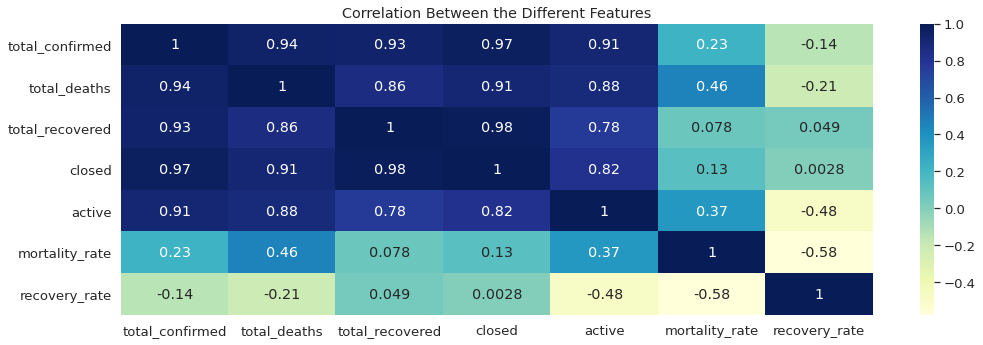

In [163]:
spearman_corr_matrix = countrywise_cases.iloc[:, 3:].corr('spearman')

rcParams['figure.figsize'] = 15, 5
plt.title('Correlation Between the Different Features')
sns.heatmap(spearman_corr_matrix, annot=True, cmap='YlGnBu')

In [ ]:
%pip install discover_feature_relationships

In [ ]:
from discover_feature_relationships import discover

In [ ]:
classifier_overrides = set()
disc = discover.discover(countrywise_cases.iloc[:, 3:], classifier_overrides)

In [ ]:
disc.pivot(index='target', columns='feature', values='score').fillna(1).style.background_gradient(cmap="Reds",
                            low=0.3, high=0.0, axis=1).set_precision(2)

feature,active,closed,mortality_rate,recovery_rate,total_confirmed,total_deaths,total_recovered
target,,,,,,,
active,1.00,-412.05,-237772.03,-158455.09,-0.93,-5.57,-2364.54
closed,-164.98,1.00,-148343.40,-59660.30,-1.25,-123.60,-6.94
mortality_rate,-1.46,-9.09,1.00,0.67,-0.03,-0.13,-6.15
recovery_rate,-1.40,-3.28,0.21,1.00,-0.17,-0.39,-2.92
total_confirmed,-95.55,-58.09,-273184.31,-102033.99,1.00,-60.32,-497.86
total_deaths,-34.58,-40.21,-43295.92,-18689.58,-0.69,1.00,-716.24
total_recovered,-140.14,0.50,-166381.17,-54515.78,-1.11,-202.44,1.00


# Kenya Analysis

In [164]:
kenya_stats = countrywise_cases.query("country == 'Kenya'")

print(f'As of {kenya_cases.index[-1]} the total number of Kenyan COVID-19 confirmed cases is: {kenya_stats.total_confirmed.values}')
print(f'As of {kenya_cases.index[-1]} the total number of Kenyan COVID-19 deaths is: {kenya_stats.total_deaths.values}')
print(f'As of {kenya_cases.index[-1]} the total number of Kenyan COVID-19 recoveries is: {kenya_stats.total_recovered.values}')
print(f'As of {kenya_cases.index[-1]} the total number of Kenyan COVID-19 closed cases is: {kenya_stats.closed.values}')
print(f'As of {kenya_cases.index[-1]} the total number of Kenyan COVID-19 active cases is: {kenya_stats.active.values}')
print(f'As of {kenya_cases.index[-1]} the Kenyan COVID-19 mortality rate is: {kenya_stats.mortality_rate.values}')
print(f'As of {kenya_cases.index[-1]} the Kenyan COVID-19 recovery rate is: {kenya_stats.recovery_rate.values}')

As of 2020-09-08 00:00:00 the total number of Kenyan COVID-19 confirmed cases is: [35356]
As of 2020-09-08 00:00:00 the total number of Kenyan COVID-19 deaths is: [599]
As of 2020-09-08 00:00:00 the total number of Kenyan COVID-19 recoveries is: [21483]
As of 2020-09-08 00:00:00 the total number of Kenyan COVID-19 closed cases is: [22082]
As of 2020-09-08 00:00:00 the total number of Kenyan COVID-19 active cases is: [13274]
As of 2020-09-08 00:00:00 the Kenyan COVID-19 mortality rate is: [2.71261661]
As of 2020-09-08 00:00:00 the Kenyan COVID-19 recovery rate is: [60.76196402]


In [165]:
kenya_cases = pd.DataFrame()
kenya_cases['confirmed'] = confirmed.loc[:, 'Kenya']
kenya_cases['deaths'] = deaths.loc[:, 'Kenya']
kenya_cases['recovered'] = recovered.loc[:, 'Kenya']

kenya_cases['daily_confirmed'] = kenya_cases['confirmed'].diff().fillna(kenya_cases['confirmed'][0]).astype('int64')
kenya_cases['daily_deaths'] = kenya_cases['deaths'].diff().fillna(kenya_cases['deaths'][0]).astype('int64')
kenya_cases['daily_recovered'] = kenya_cases['recovered'].diff().fillna(kenya_cases['recovered'][0]).astype('int64')

kenya_cases.index = pd.to_datetime(kenya_cases.index)
kenya_cases.head(2)

,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recovered
2020-01-22,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0


In [166]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['confirmed'], mode='lines+markers',name='cumulative confirmed'))
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['deaths'], mode='lines+markers',name='cumulative deaths'))
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['recovered'], mode='lines+markers',name='cumulative recoveries'))
figure.update_layout(title_text='Trend of Kenyan Cumulative Covid-19 Cases', plot_bgcolor='rgb(230, 230, 230)')
figure.show()

figure = go.Figure()
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['daily_confirmed'], mode='lines+markers',name='new confirmed'))
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['daily_deaths'], mode='lines+markers',name='new deaths'))
figure.add_trace(go.Scatter(x=kenya_cases.index, y = kenya_cases['daily_recovered'], mode='lines+markers',name='new recoveriesecoveries'))
figure.update_layout(title_text='Trend of New Kenyan Covid-19 Cases Recorded Each Day', plot_bgcolor='rgb(230, 230, 230)')
figure.show()

Comparing Eastern African covid-19 Cases


In [167]:
eastern_africa = confirmed[['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'Somalia', 'Djibouti', 'South Sudan', 'Sudan', 'Ethiopia', 'Eritrea']]
eastern_africa.index = pd.to_datetime(eastern_africa.index)

In [168]:
from plotly.subplots import make_subplots

In [170]:
figure = make_subplots( rows=3, cols=3,
    subplot_titles=('Kenya','Uganda', 'Tanzania','Rwanda', 'Burundi', 'Somalia', 'South Sudan', 'Sudan', 'Ethiopia'))

figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Kenya'],
                    marker=dict(color=eastern_africa['Kenya'], coloraxis="coloraxis")), 1, 1)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Uganda'],
                    marker=dict(color=eastern_africa['Uganda'], coloraxis="coloraxis")), 1, 2)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Tanzania'],
                    marker=dict(color=eastern_africa['Tanzania'], coloraxis="coloraxis")), 1, 3)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Rwanda'],
                    marker=dict(color=eastern_africa['Rwanda'], coloraxis="coloraxis")), 2, 1)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Burundi'],
                    marker=dict(color=eastern_africa['Burundi'], coloraxis="coloraxis")), 2, 2)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Somalia'],
                    marker=dict(color=eastern_africa['Somalia'], coloraxis="coloraxis")), 2, 3)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['South Sudan'],
                    marker=dict(color=eastern_africa['South Sudan'], coloraxis="coloraxis")), 3, 1)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Sudan'],
                    marker=dict(color=eastern_africa['Sudan'], coloraxis="coloraxis")), 3, 2)
figure.add_trace(go.Bar(x=eastern_africa.index, y=eastern_africa['Ethiopia'],
                    marker=dict(color=eastern_africa['Ethiopia'], coloraxis="coloraxis")), 3, 3)

figure.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Eastern Africa Total Confirmed cases(Cumulative)")
figure.update_layout(plot_bgcolor='rgb(230, 230, 230)')
figure.show()

In [ ]:
eastern_africa_deaths = deaths[['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'Somalia', 'Djibouti', 'South Sudan', 'Sudan', 'Ethiopia', 'Eritrea']]
eastern_africa_deaths.index = pd.to_datetime(eastern_africa_deaths.index)

In [171]:
figure = make_subplots( rows=3, cols=3,
    subplot_titles=('Kenya','Uganda', 'Tanzania','Rwanda', 'Burundi', 'Somalia', 'South Sudan', 'Sudan', 'Ethiopia'))

figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Kenya'],
                    marker=dict(color=eastern_africa_deaths['Kenya'], coloraxis="coloraxis")), 1, 1)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Uganda'],
                    marker=dict(color=eastern_africa_deaths['Uganda'], coloraxis="coloraxis")), 1, 2)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Tanzania'],
                    marker=dict(color=eastern_africa_deaths['Tanzania'], coloraxis="coloraxis")), 1, 3)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Rwanda'],
                    marker=dict(color=eastern_africa_deaths['Rwanda'], coloraxis="coloraxis")), 2, 1)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Burundi'],
                    marker=dict(color=eastern_africa_deaths['Burundi'], coloraxis="coloraxis")), 2, 2)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Somalia'],
                    marker=dict(color=eastern_africa_deaths['Somalia'], coloraxis="coloraxis")), 2, 3)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['South Sudan'],
                    marker=dict(color=eastern_africa_deaths['South Sudan'], coloraxis="coloraxis")), 3, 1)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Sudan'],
                    marker=dict(color=eastern_africa_deaths['Sudan'], coloraxis="coloraxis")), 3, 2)
figure.add_trace(go.Bar(x=eastern_africa_deaths.index, y=eastern_africa_deaths['Ethiopia'],
                    marker=dict(color=eastern_africa_deaths['Ethiopia'], coloraxis="coloraxis")), 3, 3)

figure.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Eastern African Death Cases(Cumulative)")
figure.update_layout(plot_bgcolor='rgb(230, 230, 230)')
figure.show()

Visualizing Eastern Africa's Mortality Rates Geographically


In [172]:
eastern_africa_stats = countrywise_cases.query("country == ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'Somalia', 'South Sudan', 'Sudan', 'Ethiopia']")
eastern_africa_stats

,country,longitude,latitude,total_confirmed,total_deaths,total_recovered,closed,active,mortality_rate,recovery_rate
48,Ethiopia,40.489700,9.145000,60784,949,22677,23626,37158,4.016761,37.307515
64,Kenya,37.906200,-0.023600,35356,599,21483,22082,13274,2.712617,60.761964
84,Sudan,30.217600,12.862800,13437,833,6730,7563,5874,11.014148,50.085585
115,Rwanda,29.873900,-1.940300,4439,20,2307,2327,2112,0.859476,51.971165
119,Uganda,32.290275,1.373333,3900,46,1817,1863,2037,2.469136,46.589744
121,Somalia,46.199616,5.152149,3371,97,2738,2835,536,3.421517,81.222189
133,South Sudan,31.307000,6.877000,2552,49,1290,1339,1213,3.659447,50.548589
161,Tanzania,34.888822,-6.369028,509,21,183,204,305,10.294118,35.952849
164,Burundi,29.918900,-3.373100,466,1,374,375,91,0.266667,80.257511


In [ ]:
bins = list(eastern_africa_stats['mortality_rate'].quantile([0, 0.25, 0.5, 0.75, 1]))

map = folium.Map(location=[-0.023600, 37.906200], tiles='Stamenterrain', zoom_start=5)

folium.Choropleth(geo_data=countries_geodata, data=eastern_africa_stats, columns=['country', 'mortality_rate'], key_on='feature.id', 
                  fill_color='RdPu', fill_opacity=0.7, line_opacity=0.2, legend_name="active", title="Distribution of Eastern Africa's Mortality Rates").add_to(map)

for i in range(0, len(eastern_africa_stats)):
    folium.Circle(location=[eastern_africa_stats.iloc[i]['latitude'], eastern_africa_stats.iloc[i]['longitude']],
                color='crimson', fill='crimson',
                tooltip = '<li><bold>Country : '+str(eastern_africa_stats.iloc[i]['country']) +
                        '<li><bold>Confirmed : '+str(eastern_africa_stats.iloc[i]['total_confirmed']) +
                        '<li><bold>Deaths : ' + str(eastern_africa_stats.iloc[i]['total_deaths']) +
                        '<li><bold>Recovered : '+ str(round(eastern_africa_stats.iloc[i]['total_recovered'],2)) +
                        '<li><bold>Active Cases : '+ str(round(eastern_africa_stats.iloc[i]['active'],2)) +
                        '<li><bold>Mortality Rate : '+ str(round(eastern_africa_stats.iloc[i]['mortality_rate'],2))+
                        '<li><bold>Recovery Rate : '+ str(round(eastern_africa_stats.iloc[i]['recovery_rate'],2)),
                 radius=int(eastern_africa_stats.iloc[i]['mortality_rate'] * 15000)).add_to(map)
map

- The Larger the circles, the higher the death rate in the country

In [ ]:
from google.colab import files
datewise_cases.to_csv('datewise_cases.csv') 
countrywise_cases.to_csv('countrywise_cases.csv')
files.download('datewise_cases.csv')
files.download('countrywise_cases.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Forecasting with Prophet


Prophet, or “Facebook Prophet,” is an open-source library for univariate time series forecasting developed by Facebook.

It implements a procedure for forecasting time series data based on an additive model that supports trends, seasonality and holidays where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects

Why Prophet?
- It's designed to be easy and completely automatic: Gets a reasonable forecast on messy data with no manual effort.
- It's accurate and fast: fits models in Stan so that you get forecasts in just a few seconds.
- It's robust to outliers, missing data, and dramatic shifts in trend and other changes in your time series.
- Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts.

References:
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html


In [ ]:
%pip install fbprophet

In [ ]:
from fbprophet import Prophet

# Global Cases Forecast
- Forecast of the daily cumulative world covid-19 cases projected 10 days into the future using a base model with a 95% confidence interval.

- Prophet expects an input dataframe with a specific format: 2 columns 'ds' (datestamp) column ideally in a datetime format and 'y' column that must be numeric, and represents the measurement we wish to forecast.

In [255]:
def prophet_dataset(df):
    df = df.reset_index()
    df.columns = ['ds', 'y']
    df.ds = pd.to_datetime(df.ds)

    return df

In [256]:
confirmed_p = prophet_dataset(datewise_cases['confirmed'])
deaths_p = prophet_dataset(datewise_cases['deaths'])
recovered_p = prophet_dataset(datewise_cases['recovered'])
recovered_p.tail(1)

,ds,y
230,2020-09-08,18524391


Forecast of Global Confirmed Cases

In [276]:
model_c = Prophet(interval_width=0.95)
model_c.fit(confirmed_p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [277]:
future_c = model_c.make_future_dataframe(periods=10)
confirmed_pred = model_c.predict(future_c)
confirmed_pred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,2.988469e+07,2.969679e+07,3.005093e+07,2.970516e+07,3.004954e+07,2185.803786,2185.803786,2185.803786,2185.803786,2185.803786,2185.803786,0.0,0.0,0.0,2.988688e+07
240,2020-09-18,3.014182e+07,2.995009e+07,3.035290e+07,2.993731e+07,3.033715e+07,13958.627805,13958.627805,13958.627805,13958.627805,13958.627805,13958.627805,0.0,0.0,0.0,3.015578e+07


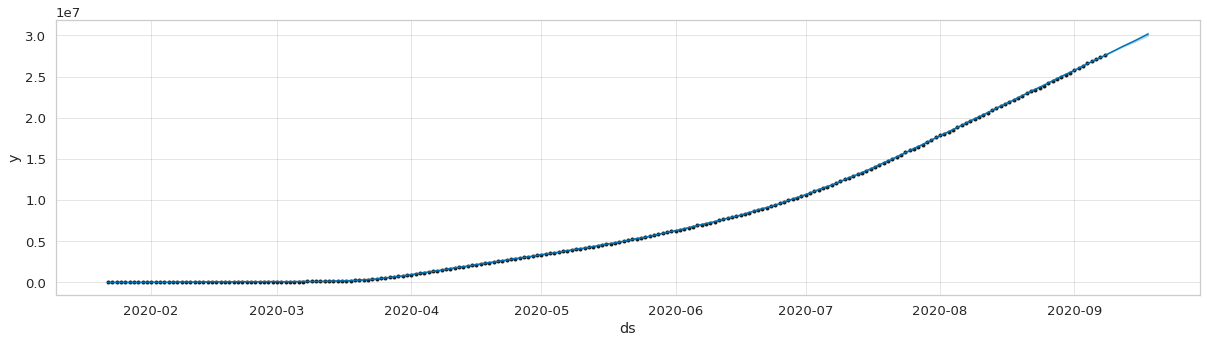

In [278]:
confirmed_plot = model_c.plot(confirmed_pred, figsize=(17, 5))
confirmed_plot.show()

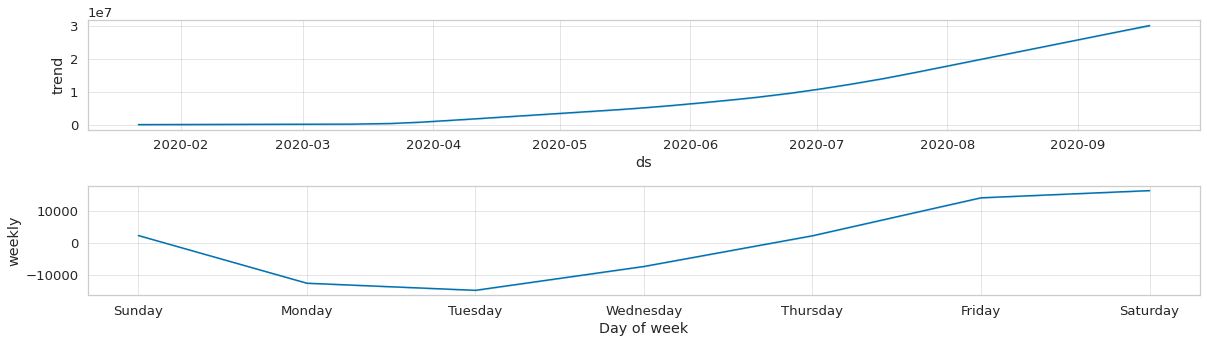

In [279]:
confirmed_components = model_c.plot_components(confirmed_pred, figsize=(17, 5))
confirmed_components.show()

Forecasting World Death Cases

In [280]:
model_d = Prophet(interval_width=0.95)
model_d.fit(deaths_p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [281]:
future_d = model_d.make_future_dataframe(periods=10)
deaths_pred = model_d.predict(future_d)
deaths_pred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,951249.917955,942587.259264,959106.786050,941753.591192,959208.799714,446.137686,446.137686,446.137686,446.137686,446.137686,446.137686,0.0,0.0,0.0,951696.055641
240,2020-09-18,957008.276343,947317.046519,967538.250882,946288.247777,966033.933214,921.418146,921.418146,921.418146,921.418146,921.418146,921.418146,0.0,0.0,0.0,957929.694489


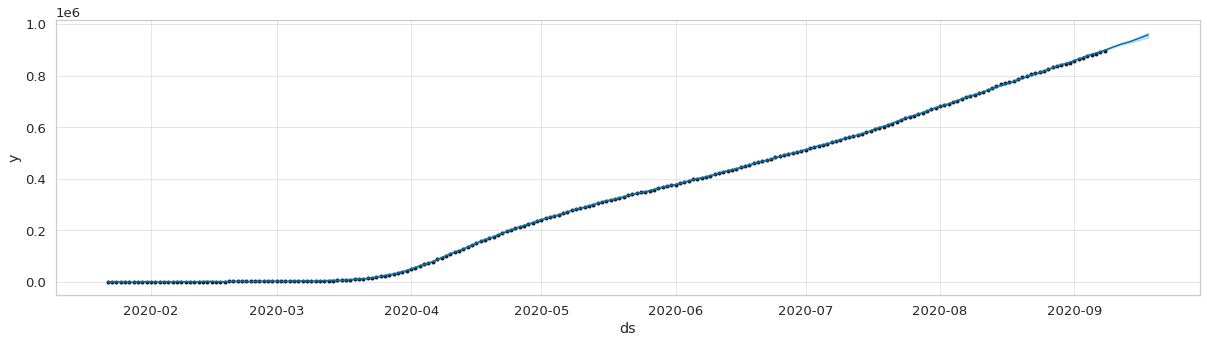

In [282]:
deaths_plot = model_d.plot(deaths_pred, figsize=(17, 5))
deaths_plot.show()

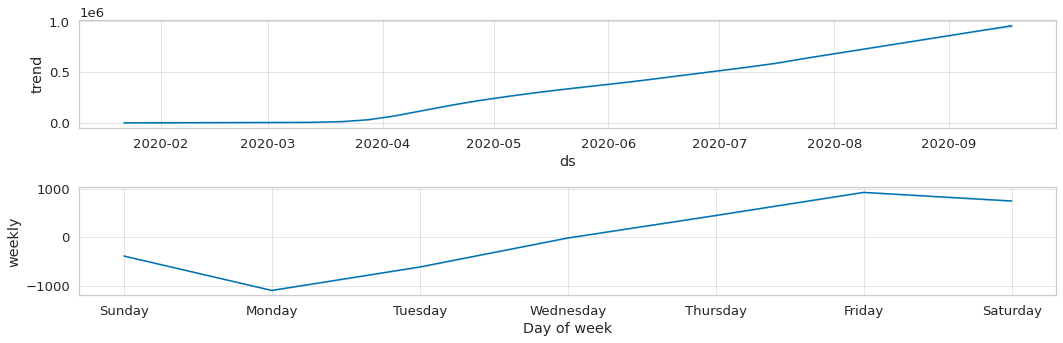

In [283]:
deaths_components = model_d.plot_components(deaths_pred, figsize=(15, 5))
deaths_components.show()

Forecasting World's Recovered Cases

In [284]:
model_r = Prophet(interval_width=0.95)
model_r.fit(recovered_p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [285]:
future_r = model_r.make_future_dataframe(periods=10)
recovered_pred = model_r.predict(future_r)
recovered_pred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,2.036547e+07,2.021442e+07,2.054027e+07,2.020873e+07,2.052069e+07,4115.590392,4115.590392,4115.590392,4115.590392,4115.590392,4115.590392,0.0,0.0,0.0,2.036958e+07
240,2020-09-18,2.057381e+07,2.039439e+07,2.077678e+07,2.039684e+07,2.076000e+07,6114.420969,6114.420969,6114.420969,6114.420969,6114.420969,6114.420969,0.0,0.0,0.0,2.057993e+07


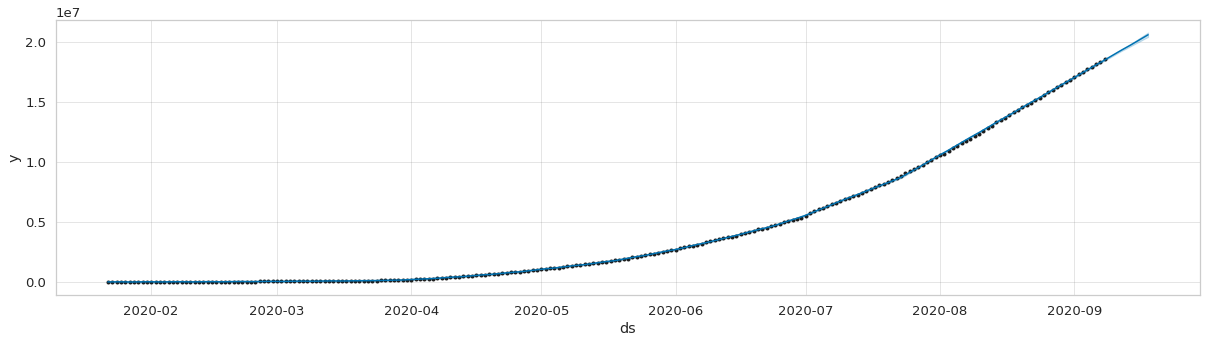

In [286]:
recovered_plot = model_r.plot(recovered_pred, figsize=(17, 5))
recovered_plot.show()

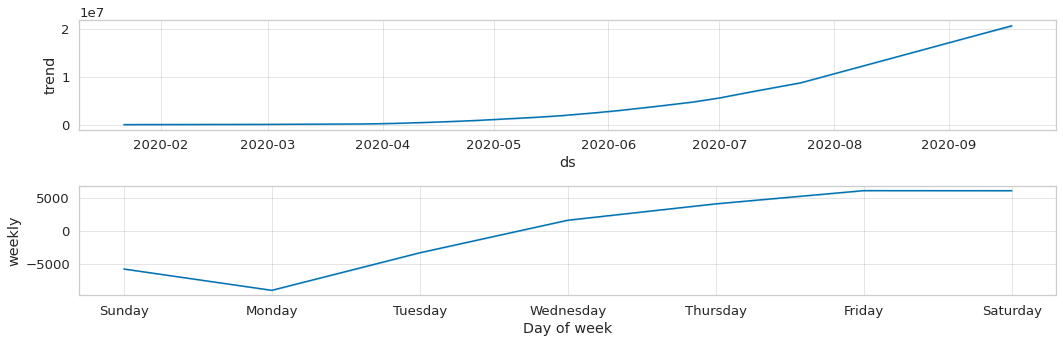

In [287]:
recovered_components = model_r.plot_components(recovered_pred, figsize=(15, 5))
recovered_components.show()

In [305]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=confirmed_pred.ds, y = confirmed_pred.yhat, mode='lines+markers', name='global confirmed forecast'))
figure.add_trace(go.Scatter(x=deaths_pred.ds, y = deaths_pred.yhat, mode='lines+markers', name='global deaths forecast'))
figure.add_trace(go.Scatter(x=recovered_pred.ds, y = recovered_pred.yhat, mode='lines+markers', name='global recovered forecast'))

figure.update_layout(title_text='Global Forecast of Covid-19 Cases', plot_bgcolor='rgb(230, 230, 230)')
figure.show()

# Kenyan Cases Forecast

- Forecast of the Kenyan Covid-19 Cumulative Daily Cases Projected 10 days into the Future

In [225]:
confirmed_kenya = prophet_dataset(kenya_cases['confirmed'])
deaths_kenya = prophet_dataset(kenya_cases['deaths'])
recovered_kenya = prophet_dataset(kenya_cases['recovered'])
deaths_kenya.tail(2)

,ds,y
229,2020-09-07,599
230,2020-09-08,599


Forecasting Kenyan Confirmed cases

In [289]:
model_kc = Prophet(interval_width=0.95)
model_kc.fit(confirmed_kenya)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [295]:
future_c = model_kc.make_future_dataframe(periods=10)
confirmed_kpred = model_kc.predict(future_c)
confirmed_kpred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,43207.231176,41661.087526,44700.502806,42882.097614,43495.343980,37.748576,37.748576,37.748576,37.748576,37.748576,37.748576,0.0,0.0,0.0,43244.979752
240,2020-09-18,43685.933697,42183.312766,45378.163124,43309.441828,44023.314994,28.958236,28.958236,28.958236,28.958236,28.958236,28.958236,0.0,0.0,0.0,43714.891933


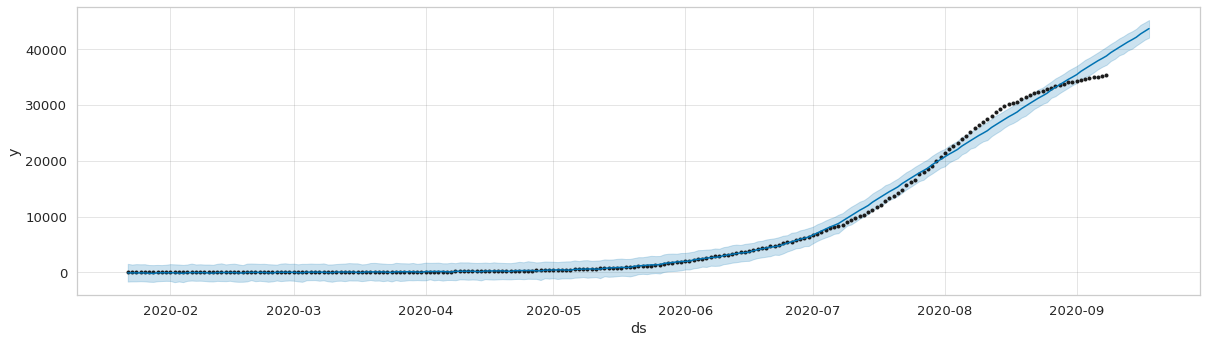

In [291]:
confirmed_kplot = model_kc.plot(confirmed_kpred, figsize=(17, 5))
confirmed_kplot.show()

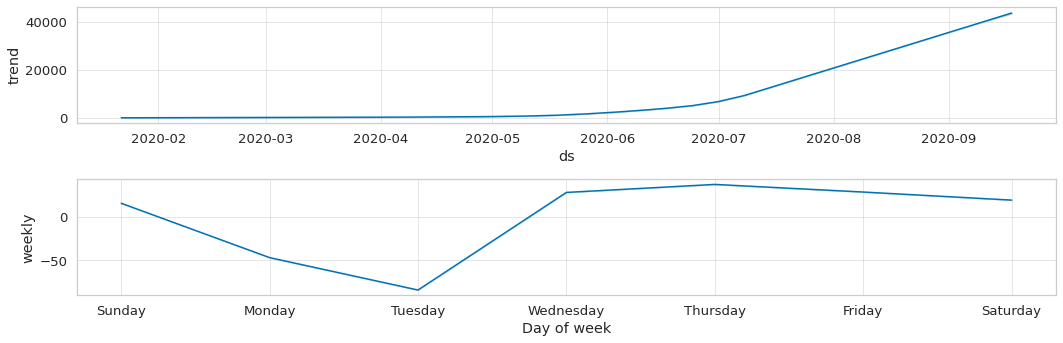

In [292]:
confirmed_kcomponents = model_kc.plot_components(confirmed_kpred, figsize=(15, 5))
confirmed_kcomponents.show()

Forecasting Kenya's Deaths Cases

In [293]:
model_kd = Prophet(interval_width=0.95)
model_kd.fit(deaths_kenya)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [296]:
future_d = model_kd.make_future_dataframe(periods=10)
deaths_kpred = model_kd.predict(future_d)
deaths_kpred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,716.986496,698.556919,736.423230,711.403859,722.175607,0.544480,0.544480,0.544480,0.544480,0.544480,0.544480,0.0,0.0,0.0,717.530976
240,2020-09-18,724.849946,708.791619,744.294201,718.139200,731.010565,0.910589,0.910589,0.910589,0.910589,0.910589,0.910589,0.0,0.0,0.0,725.760535


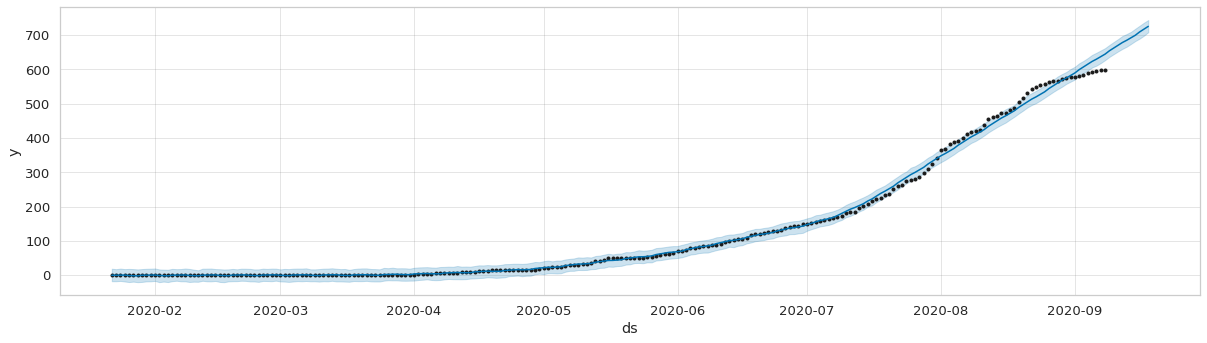

In [297]:
deaths_kplot = model_kd.plot(deaths_kpred, figsize=(17, 5))
deaths_kplot.show()

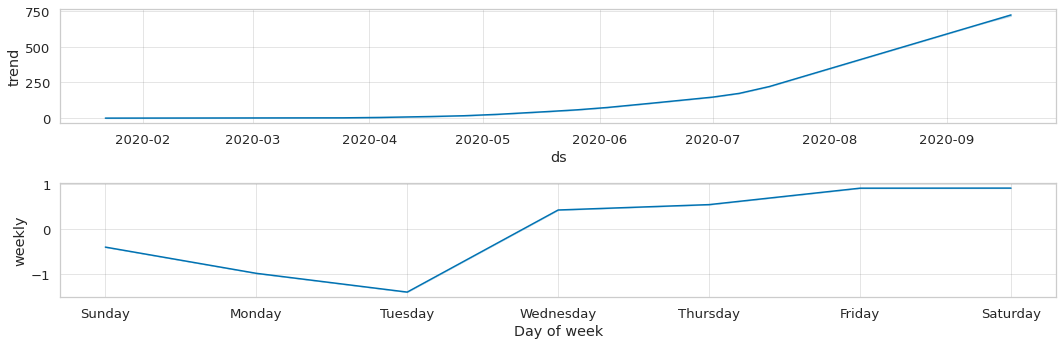

In [298]:
deaths_kcomponents = model_kd.plot_components(deaths_kpred, figsize=(15, 5))
deaths_kcomponents.show()

Forecasting Kenya's Recovered Cases

In [299]:
model_kr = Prophet(interval_width=0.95)
model_kr.fit(recovered_kenya)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [300]:
future_r = model_kr.make_future_dataframe(periods=10)
recovered_kpred = model_kr.predict(future_r)
recovered_kpred.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
239,2020-09-17,26302.607754,25277.924282,27346.215141,26090.130728,26505.827915,20.663666,20.663666,20.663666,20.663666,20.663666,20.663666,0.0,0.0,0.0,26323.271420
240,2020-09-18,26655.074127,25727.362970,27626.710460,26411.287227,26890.629060,2.150211,2.150211,2.150211,2.150211,2.150211,2.150211,0.0,0.0,0.0,26657.224338


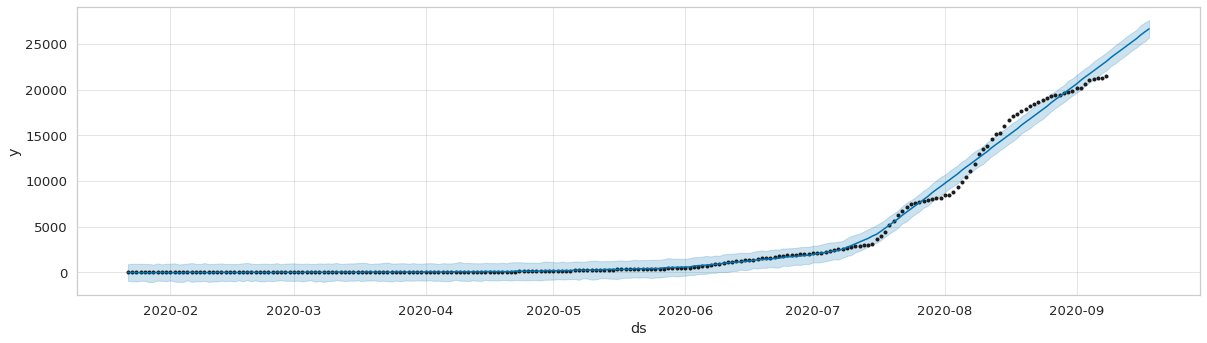

In [301]:
recovered_kplot = model_kr.plot(recovered_kpred, figsize=(17, 5))
recovered_kplot.show()

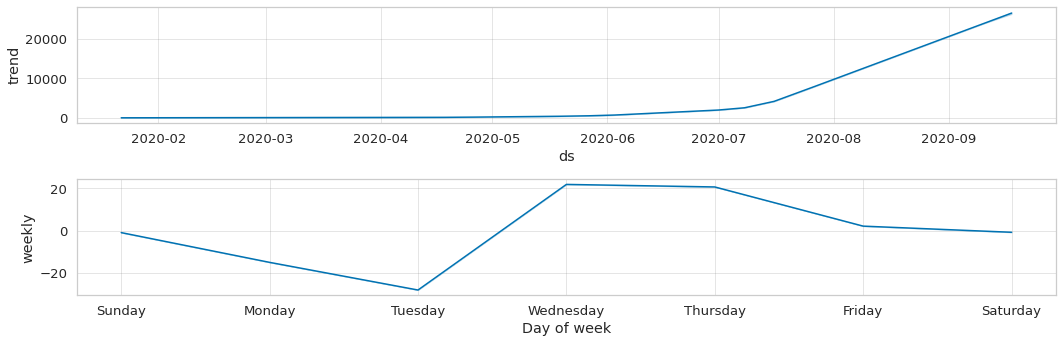

In [302]:
recovered_kcomponents = model_kr.plot_components(recovered_kpred, figsize=(15, 5))
recovered_kcomponents.show()

In [304]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=confirmed_kpred.ds, y = confirmed_kpred.yhat, mode='lines+markers',name='kenya confirmed forecast'))
figure.add_trace(go.Scatter(x=deaths_kpred.ds, y = deaths_kpred.yhat, mode='lines+markers',name='kenya deaths forecast'))
figure.add_trace(go.Scatter(x=recovered_kpred.ds, y = recovered_kpred.yhat, mode='lines+markers',name='kenya recovered forecast'))
figure.update_layout(title_text='Forecast of Kenyan Covid-19 Cases', plot_bgcolor='rgb(230, 230, 230)')
figure.show()